# Model of Ablation
---

Following the guidance provided [here](https://www.spaceacademy.net.au/watch/debris/metflite.htm).

From the drag equation we have:
\begin{align}
\dot v &= \frac{1}{m} \frac{1}{2} C_D A \rho_a v^2 \\
&= \frac{1}{m} \frac{1}{2} C_D \left(A_0 \left(\frac{m}{\rho_m}\right)^{2/3}\right) \rho_a v^2 \\
&= \frac{1}{2} C_D A_0 \rho_a v^2 / (m^{1/3} \rho_m^{2/3})
\end{align}

We are saying some portion of the kinetic energy that the meteor loses goes into melting parts of the mass from the meteor. This can be expressed as:
$$ \dot m = \frac{\Lambda}{2\zeta} \left( C_D A_0 \rho_a v^3 \left(\frac{m}{\rho_m}\right)^{2/3}\right) $$
where $\Lambda$ is the proportionality constant and $\zeta$ the heat of ablation for our material.

Finally, we are assuming that some fraction of the energy that goes into shrinking the meteor is emitted as light:
$$ I = \epsilon \frac{1}{2} \dot m v^2 $$
where $\epsilon$ is the luminous efficiency here.

In [235]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('seaborn-darkgrid')
import numpy as np
import pandas as pd

In [257]:
# Definiting constants
A0 = 1.2
CD = 1
h = 150000 #m
ζ = 3_000_000        #J/kg
Λ = 0.15
ϵ = 0.001
h0 = 100_000 #m
ρa = lambda h: 1.3*np.exp(-h/7000) # To account for variable atmosphere density. h is the altitude
Mv = lambda h,I: 6.8 - 2.5*np.log10(I*h0**2/h**2)# calculate visual magnitude

In [267]:
# Variables
θ = np.radians(45) #Entry angle
m = 0.001 #kg
ρm = 500      #kg/m^3
v = 25000 #m/s

def sim_entry(m, ρm, v, θ):
    θ = np.radians(θ)
    v = v*1000
    h = 150000 #m
    t = 0
    dt = 0.0001
    
    row_list = [] #<-- omg this is so much faster than dataframe appending!

    while v > 1000:
        vdot = CD*A0*ρa(h)*v**2 / (m**(1/3)*ρm**(2/3))
        mdot = Λ/(2*ζ)*(CD*A0*ρa(h)*v**3*(m/ρm)**(2/3))
        h -= v*dt*np.cos(θ)
        v -= vdot * dt
        m -= mdot * dt
        t += dt

        Iv = 0.5*ϵ*mdot*v**2
        mag = Mv(h,Iv)
        
        mydict = {}
        mydict.update({'Time':t, 'Height':h, 'Speed':v, 'Mass':m, 'Mag':mag})
        row_list.append(mydict)
    df = pd.DataFrame(row_list,columns=['Time', 'Height', 'Speed', 'Mass', 'Mag'])
    return df
    

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


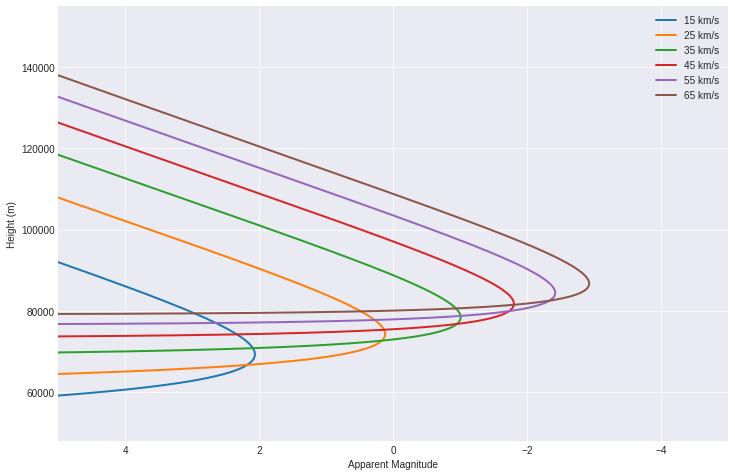

In [271]:
df15 = sim_entry(0.001,500,15,45)
df25 = sim_entry(0.001,500,25,45)
df35 = sim_entry(0.001,500,35,45)
df45 = sim_entry(0.001,500,45,45)
df55 = sim_entry(0.001,500,55,45)
df65 = sim_entry(0.001,500,65,45)


plt.figure(figsize=(12,8))
plt.plot(df15.Mag, df15.Height, label='15 km/s', lw=2)
plt.plot(df25.Mag, df25.Height, label='25 km/s', lw=2)
plt.plot(df35.Mag, df35.Height, label='35 km/s', lw=2)
plt.plot(df45.Mag, df45.Height, label='45 km/s', lw=2)
plt.plot(df55.Mag, df55.Height, label='55 km/s', lw=2)
plt.plot(df65.Mag, df65.Height, label='65 km/s', lw=2)
plt.xlim([5,-5])
plt.xlabel('Apparent Magnitude')
plt.ylabel('Height (m)')
plt.legend()
plt.show()

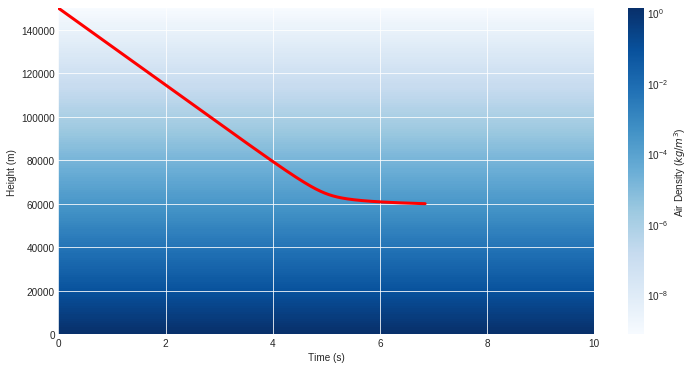

In [247]:
X,Y = np.meshgrid(np.arange(0,10), np.arange(0,150000,1000))
Den = ρa(Y)
plt.figure(figsize=(12,6))
plt.imshow(Den, origin='lower', extent=[0,10,0,150000], aspect='auto', cmap='Blues', 
           norm=colors.LogNorm(vmin=np.min(Den), vmax=np.max(Den)))
plt.colorbar(label='Air Density ($kg/m^3$)')
plt.plot(df.Time, df.Height, lw=3, color='red')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.show()

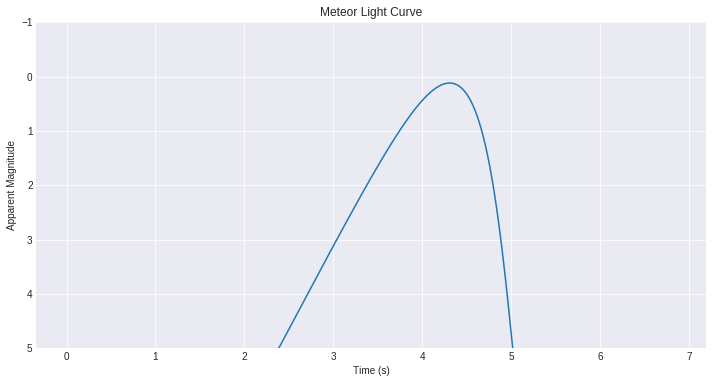

In [251]:
plt.figure(figsize=(12,6))
plt.plot(df.Time, df.Mag)
plt.ylim(5,-1)
plt.xlabel('Time (s)')
plt.ylabel('Apparent Magnitude')
plt.title('Meteor Light Curve')
plt.show()

In [233]:
df.iloc[1499]

Time           1.500000
Height    123483.828661
Speed      24998.694654
Mass           0.000999
Mag            7.713591
Name: 1499, dtype: float64

## Direct translation of their code:
---

In [225]:
print("METEOR FLIGHT")
imass = float(input("  Initial Mass (kg)? "))
mdens = float(input("  Density (kg/m^3)? "))
ivelk = float(input("  Speed at Entry (km/s)? "))
zadeg = float(input("  Zenith Angle (deg)? "))
#parameters
pi = 3.14159
dr = np.pi / 180                  #degrees to radians
Asf = 1.2                      #meteoroid shape factor
Le = .001                      #luminous efficiency
Dc = 1                         #drag coefficient
Htc = .15                      #heat transfer coefficient
Ha = 3000000                   #heat of ablation (J/kg)

#convert inputs
mm = imass                     #current meteoroid mass (kg)
cza = np.cos(zadeg * dr)          #cosine of zenith angle
vel = ivelk * 1000              #current meteoroid velocity (m/s)


#loop values
h = 150000                     #starting height (m)
t = 0                          #time variable - initially zero seconds
dt = .0001                     #time step in seconds
tprint = 1.5                   #first print time (secs)

print()
print(" TIME    HEIGHT    SPEED    DECEL    MASS     VISUAL")
print("  (S)     (KM)    (KM/S)   (M/S/S)    (%)      MAG")
#f$ = "##.##    ###.#     ##.#    ######   ###.#     ###.# &"

#computational loop
while True:
    rho = 1.3 * np.exp(-h / 7000)    #atmospheric density (kg/m^3) at height h km
    #now compute meteoroid deceleration and mass loss
    decl = Dc * Asf * rho * vel * vel / ((mm ** .33333) * (mdens ** .66667))
    ML = Htc * Asf * rho * vel * vel * vel * ((mm / mdens) ** .66667) / (2 * Ha)
    dv = decl * dt         #velocity decrement = decleration * time_increment
    dm = ML * dt           #mass decrement = mass_loss * time_increment
    t = t + dt                      #increment time
    h = h - vel * dt * cza          #compute new height
    vel = vel - dv                  #new veloicty
    mm = mm - dm                    #new mass
    Iv = .5 * Le * ML * vel * vel        #visual power (watts)
    Mv = 6.8 - 2.5 * np.log10(Iv * (100000 / h) ** 2)  #visual magnitude
    fracmass = mm / imass            #fractional mass remaining
    if t > tprint: #print loop
        if Mv < 5:
            vis = "vis"
        else:
            vis = ""   #is meteor visible?
        print(f"{t:>5.2f}    {h/1000:>5.1f}     {vel/1000:>4.1f}   {decl:>6.0f}     {fracmass*100:>5.1f}     {Mv:>5.1f} {vis}")
        tprint = tprint + .5           #increment print time
        if vel < 1000:
            break     #exit if velocity < 1 km/sec


METEOR FLIGHT


  Initial Mass (kg)?  0.001
  Density (kg/m^3)?  500
  Speed at Entry (km/s)?  25
  Zenith Angle (deg)?  45



 TIME    HEIGHT    SPEED    DECEL    MASS     VISUAL
  (S)     (KM)    (KM/S)   (M/S/S)    (%)      MAG
 1.50    123.5     25.0        3      99.9       7.7 
 2.00    114.6     25.0       12      99.7       6.2 
 2.50    105.8     25.0       42      99.0       4.6 vis
 3.00     97.0     24.9      150      96.4       3.1 vis
 3.50     88.2     24.8      537      87.7       1.6 vis
 4.00     79.5     24.2     1987      62.6       0.4 vis
 4.50     71.2     22.1     8157      17.9       0.3 vis
 5.00     64.7     13.2    27511       0.4       4.7 vis
 5.50     61.9      4.2     7937       0.1      11.8 
 6.00     60.9      2.0     2280       0.0      15.7 
 6.50     60.3      1.3      990       0.0      18.1 
 7.00     59.9      0.9      537       0.0      19.9 
